In [1]:
import pandas as pd

from google.colab import files

from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt

In [11]:

# Upload the file

uploaded = files.upload()

Saving combined_weather_data.csv to combined_weather_data (1).csv


In [12]:
# Load the data

file_name = list(uploaded.keys())[0]

Historical_data = pd.read_csv("/content/combined_weather_data (1).csv")

In [13]:
# Ensure the 'datetime' column is converted to datetime type

if 'datetime' in Historical_data.columns:

    Historical_data['datetime'] = pd.to_datetime(Historical_data['datetime'], format='%Y-%m-%d', errors='coerce')

else:

    print("Error: 'datetime' column not found in the data")

In [14]:
# Debug: Print first few rows to ensure datetime conversion

print(Historical_data.head())

    name   datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  Lagos 2017-01-01     34.0     22.0  27.6          37.3          22.0   
1  Lagos 2017-01-02     35.0     23.9  28.3          40.0          23.9   
2  Lagos 2017-01-03     34.2     24.0  28.4          37.3          24.0   
3  Lagos 2017-01-04     35.0     23.9  28.4          36.3          23.9   
4  Lagos 2017-01-05     34.0     22.4  27.9          38.5          22.4   

   feelslike   dew  humidity  ...  severerisk              sunrise  \
0       29.4  22.0      74.3  ...         NaN  2017-01-01T06:57:27   
1       30.9  23.7      78.2  ...         NaN  2017-01-02T06:57:52   
2       30.3  22.6      73.5  ...         NaN  2017-01-03T06:58:17   
3       28.7  20.3      66.4  ...         NaN  2017-01-04T06:58:41   
4       30.4  22.9      76.2  ...         NaN  2017-01-05T06:59:04   

                sunset moonphase        conditions  \
0  2017-01-01T18:42:46      0.11  Partially cloudy   
1  2017-01-02T18:43:

In [15]:

# Remove rows with NaT in 'datetime' column

Historical_data = Historical_data.dropna(subset=['datetime'])

In [16]:

# Debug: Check for NaT values

print(Historical_data['datetime'].isna().sum())

0


In [17]:
# Set 'datetime' column as the index

Historical_data.set_index('datetime', inplace=True)

In [19]:

# Ensure index is monotonic

Historical_data.sort_index(inplace=True)

In [24]:
# Debug: Check the index type and first few index values

print(Historical_data.index)

print(Historical_data.index.is_monotonic_increasing)

# Set frequency (D for daily data, adjust as needed)

Historical_data = Historical_data.asfreq('D')

DatetimeIndex(['2002-01-01', '2002-01-01', '2002-01-01', '2002-01-01',
               '2002-01-02', '2002-01-02', '2002-01-02', '2002-01-02',
               '2002-01-03', '2002-01-03',
               ...
               '2025-02-24', '2025-02-24', '2025-02-25', '2025-02-25',
               '2025-02-26', '2025-02-26', '2025-02-27', '2025-02-27',
               '2025-02-28', '2025-02-28'],
              dtype='datetime64[ns]', name='datetime', length=35192, freq=None)
True


ValueError: cannot reindex on an axis with duplicate labels

In [25]:
# Set a new unique index based on the existing date column (assuming it exists)
if 'Date' in Historical_data.columns:  # Replace 'Date' with your actual date column name
  Historical_data.set_index('Date', inplace=True)


In [26]:

# Debug: Check frequency

print(Historical_data.index.freq)

None


In [27]:
# Create 'flood' column based on precipitation threshold

threshold = 30  # Precipitation threshold in mm

Historical_data['flood'] = (Historical_data['precip'] > threshold).astype(int)

In [28]:
# Debug: Print first few rows to ensure 'flood' column is created

print(Historical_data.head())

from statsmodels.tsa.arima.model import ARIMA

             name  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
datetime                                                                
2002-01-01  Lagos     28.6     25.6  27.2          33.8          25.6   
2002-01-01  Lagos     28.6     25.6  27.2          33.8          25.6   
2002-01-01  Lagos     28.6     25.6  27.2          33.8          25.6   
2002-01-01  Lagos     28.6     25.6  27.2          33.8          25.6   
2002-01-02  Lagos     33.1     26.1  29.0          39.4          26.1   

            feelslike   dew  humidity  precip  ...              sunrise  \
datetime                                       ...                        
2002-01-01       30.7  25.2      88.7     0.0  ...  2002-01-01T06:57:21   
2002-01-01       30.7  25.2      88.7     0.0  ...  2002-01-01T06:57:21   
2002-01-01       30.7  25.2      88.7     0.0  ...  2002-01-01T06:57:21   
2002-01-01       30.7  25.2      88.7     0.0  ...  2002-01-01T06:57:21   
2002-01-02       33.8  25.1      80.5 

In [29]:
# Fit ARIMA model

model = ARIMA(Historical_data['precip'], order=(5, 1, 0))  # Example order, adjust as needed

model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [31]:
# Debug: Print summary of the model

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 precip   No. Observations:                35192
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -121563.936
Date:                Mon, 08 Jul 2024   AIC                         243139.873
Time:                        10:53:19   BIC                         243190.684
Sample:                             0   HQIC                        243156.053
                              - 35192                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0014      0.119     -0.012      0.991      -0.234       0.231
ar.L2         -0.0028      0.018     -0.157      0.875      -0.038       0.032
ar.L3         -0.0004      0.144     -0.003      0.9

In [32]:

# Forecast future precipitation

forecast_steps = 365  # Number of future days to predict

forecast = model_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [33]:
# Debug: Print forecasted values

print(forecast)

# Handle last_date as a datetime object

last_date = Historical_data.index[-1]  # Using the last datetime from the index

35192    1.827054
35193    1.826510
35194    1.249083
35195    1.244873
35196    1.237813
           ...   
35552    1.381517
35553    1.381517
35554    1.381517
35555    1.381517
35556    1.381517
Name: predicted_mean, Length: 365, dtype: float64


In [34]:
# Create future dates

future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)

In [36]:
# Create a DataFrame for the forecast

future_data = pd.DataFrame({'datetime': future_dates, 'precip_forecast': forecast})

future_data.set_index('datetime', inplace=True)

In [37]:

# Print future data

print(future_data.head())

            precip_forecast
datetime                   
2025-03-01         1.827054
2025-03-02         1.826510
2025-03-03         1.249083
2025-03-04         1.244873
2025-03-05         1.237813


In [38]:

# Add flood prediction based on the forecasted precipitation

future_data['flood_forecast'] = (future_data['precip_forecast'] > threshold).astype(int)

In [39]:
# Print future data with flood forecast

print(future_data.head())

import matplotlib.pyplot as plt

            precip_forecast  flood_forecast
datetime                                   
2025-03-01         1.827054               0
2025-03-02         1.826510               0
2025-03-03         1.249083               0
2025-03-04         1.244873               0
2025-03-05         1.237813               0


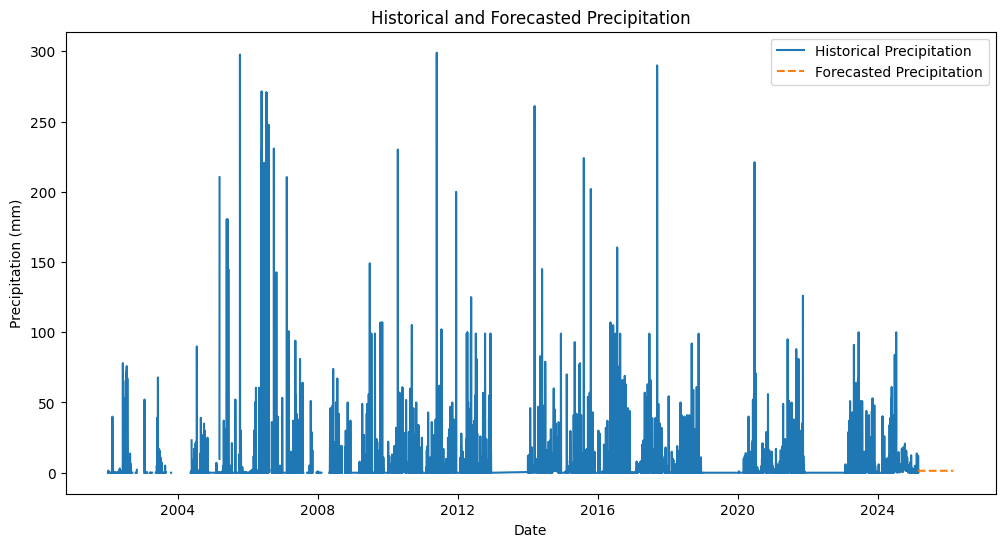

In [40]:
# Plot historical precipitation and forecasted precipitation

plt.figure(figsize=(12, 6))

plt.plot(Historical_data.index, Historical_data['precip'], label='Historical Precipitation')

plt.plot(future_data.index, future_data['precip_forecast'], label='Forecasted Precipitation', linestyle='--')

plt.xlabel('Date')

plt.ylabel('Precipitation (mm)')

plt.title('Historical and Forecasted Precipitation')

plt.legend()

plt.show()

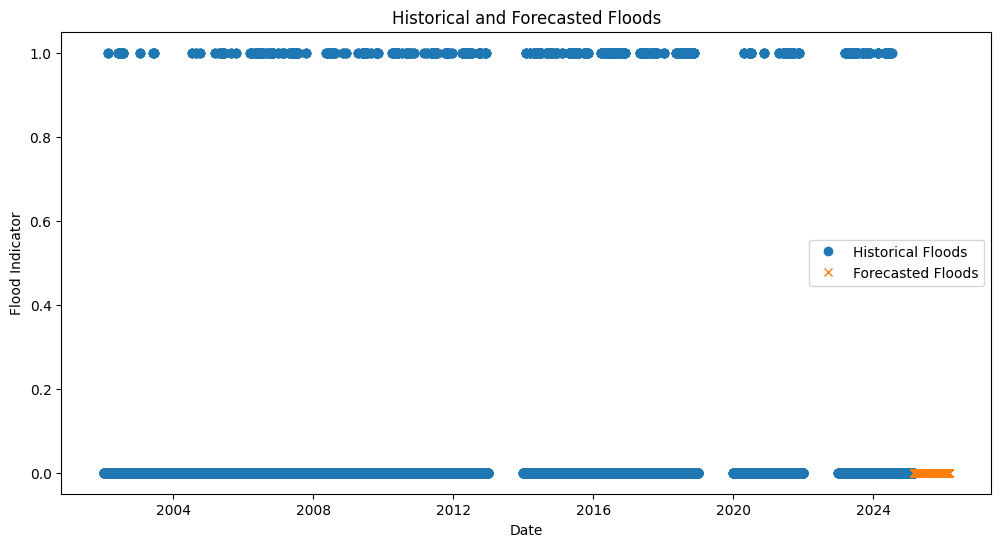

In [41]:
# Plot historical flood occurrences and forecasted flood predictions

plt.figure(figsize=(12, 6))

plt.plot(Historical_data.index, Historical_data['flood'], label='Historical Floods', linestyle='', marker='o')

plt.plot(future_data.index, future_data['flood_forecast'], label='Forecasted Floods', linestyle='', marker='x')

plt.xlabel('Date')

plt.ylabel('Flood Indicator')

plt.title('Historical and Forecasted Floods')

plt.legend()

plt.show()

In [42]:
# Combine historical and forecasted data

combined_data = pd.concat([Historical_data, future_data], sort=False)

combined_data.reset_index(inplace=True)

In [43]:
# Save combined data to CSV

combined_data.to_csv('combined_historical_forecast_datas.csv', index=False)

In [44]:
# Print combined data

print(combined_data.tail())

        datetime name  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
35552 2026-02-24  NaN      NaN      NaN   NaN           NaN           NaN   
35553 2026-02-25  NaN      NaN      NaN   NaN           NaN           NaN   
35554 2026-02-26  NaN      NaN      NaN   NaN           NaN           NaN   
35555 2026-02-27  NaN      NaN      NaN   NaN           NaN           NaN   
35556 2026-02-28  NaN      NaN      NaN   NaN           NaN           NaN   

       feelslike  dew  humidity  ...  moonphase  conditions  description icon  \
35552        NaN  NaN       NaN  ...        NaN         NaN          NaN  NaN   
35553        NaN  NaN       NaN  ...        NaN         NaN          NaN  NaN   
35554        NaN  NaN       NaN  ...        NaN         NaN          NaN  NaN   
35555        NaN  NaN       NaN  ...        NaN         NaN          NaN  NaN   
35556        NaN  NaN       NaN  ...        NaN         NaN          NaN  NaN   

       stations  windspeedmax  windspeedmin  flood

In [45]:
# Step 1: Define your threshold (adjust as needed)

threshold = 22  # Example threshold (in mm)

In [46]:

# Step 2: Create a flood indicator based on the threshold

future_data['flood_forecast'] = (future_data['precip_forecast'] > threshold).astype(int)

In [49]:
# Step 3: Check for flood days and identify the exact flood day

flood_days = future_data.loc[future_data['flood_forecast'] == 1]


if not flood_days.empty:

    exact_flood_day = flood_days.index[0]

    print(f"Exact flood day predicted: {exact_flood_day}")

else:

    print("No flood days predicted in the forecast period.")



No flood days predicted in the forecast period.
